#*Predicting* *Diabetes* *by* *using* *Machine* *Learning* *KNN* *algo*:

In [ ]:
from google.colab import drive
try:
  drive.mount("/content/drive")
except:
  raise KeyboardInterrupt


Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/My Drive/diabetes.csv')

# New Section

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info() # to get whole info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.corr().T  # to get correlation between features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## #**Import** **Classifier** 

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier

In [ ]:
# Select dependent independent variables
x= df[["Glucose"]]
y=df[["Outcome"]]

## ***#Divide*** ***dataset*** ***into*** ***train*** ***and*** ***test*** ***dataset***

In [ ]:
# Import train, test, split from sklearn library
from sklearn.model_selection import train_test_split

In [ ]:
# train and test dataset
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [ ]:
x_train.shape

(537, 1)

In [ ]:
y_train.shape

(537, 1)

In [ ]:
y_train

,Outcome
580,1
284,1
269,1
71,0
615,0
...,...
233,0
134,0
455,1
733,0


### **Initialize** **the** **Classifier** 

In [ ]:
# Initialize the classifier
clf=MLPClassifier(hidden_layer_sizes=(51), solver='lbfgs', alpha=1e-5)

**Fill** **the** **Data** 

In [ ]:
# Fit the data
clf.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=51, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Pridict Data
y_Pridict=clf.predict(x_test)

**#Check accuracy score as well as confusion matrix**

In [ ]:
# Check accuracy score using sklearn library
!pip install sklearn




In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

print(accuracy_score(y_train,y_Pridict))

0.7318435754189944


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_Pridict,y_test))

[[142  40]
 [ 11  38]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

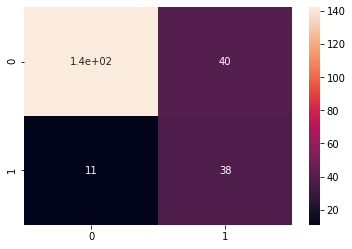

In [ ]:
sns.heatmap(confusion_matrix(y_Pridict,y_test),annot=True)

In [ ]:
y_Pridict.shape

(537,)

In [ ]:
a=clf.predict(([[11]]))

In [ ]:
# Check classification report
from sklearn.metrics import classification_report
print(classification_report,(y_test,y_Pridict))

<function classification_report at 0x7ffaaaa0a620> (     Outcome
319        1
227        1
628        0
381        0
409        1
..       ...
682        0
532        0
686        0
714        0
757        1

[231 rows x 1 columns], array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
if a==0:
  print("You are Diabetic free")
else:
  print("You have diabetese, concern doctor")

You are Diabetic free
